27,000 images (1500 per symbol)

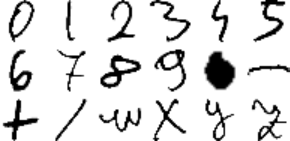

In [1]:
!pip install tensorflow

In [2]:
import os
import time
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,BatchNormalization,Dropout,Flatten
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import plot_model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [3]:
#Github Dataset link: https://github.com/wblachowski/bhmsds/tree/17d0d39246216cca13dd452edd9722eb893191a4

!git clone https://github.com/wblachowski/bhmsds.git


%cd bhmsds

!ls


Cloning into 'bhmsds'...
remote: Enumerating objects: 27038, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 27038 (delta 0), reused 0 (delta 0), pack-reused 27035
Receiving objects: 100% (27038/27038), 11.37 MiB | 25.65 MiB/s, done.
Resolving deltas: 100% (8/8), done.
Updating files: 100% (27003/27003), done.
/content/bhmsds
assets	LICENSE  README.md  symbols


In [4]:
source_dir = '/content/bhmsds/symbols'

# Define the target directory where the organized data will be stored
target_dir = '/content/organized_symbols'

# Create target directory if it doesn't exist
os.makedirs(target_dir, exist_ok=True)

# Iterate over each image file
for filename in os.listdir(source_dir):
    if filename.endswith('.png'):
        # Extract the label (first character of the filename)
        label = filename.split('-')[0]

        # Create label directory if it doesn't exist
        label_dir = os.path.join(target_dir, label)
        os.makedirs(label_dir, exist_ok=True)

        # Move the image file to the label directory
        shutil.move(os.path.join(source_dir, filename), os.path.join(label_dir, filename))


In [5]:
%cd /content/organized_symbols/
!ls

/content/organized_symbols
0  1  2  3  4  5  6  7	8  9  dot  minus  plus	slash  w  x  y	z


In [ ]:
dataset_dir = '/content/organized_symbols'

# Create ImageDataGenerator for training data with validation split
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.15

)

# Load training data
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Load validation data
validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

model = Sequential([

    # Convolutional layers
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),


    # Fully connected layers
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),

    # Output layer
    Dense(18, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

model.fit(train_generator, epochs=10, validation_data=validation_generator, callbacks=[early_stopping])

stop=time.time()
print(stop-start)

Found 22950 images belonging to 18 classes.
Found 4050 images belonging to 18 classes.
Epoch 1/10
718/718 [==============================] - 22s 22ms/step - loss: 1.1389 - accuracy: 0.6476 - val_loss: 0.1961 - val_accuracy: 0.9435
Epoch 2/10
718/718 [==============================] - 13s 18ms/step - loss: 0.3295 - accuracy: 0.9035 - val_loss: 0.0992 - val_accuracy: 0.9696
Epoch 3/10
718/718 [==============================] - 13s 18ms/step - loss: 0.2343 - accuracy: 0.9321 - val_loss: 0.0923 - val_accuracy: 0.9714
Epoch 4/10
718/718 [==============================] - 13s 18ms/step - loss: 0.1890 - accuracy: 0.9447 - val_loss: 0.0882 - val_accuracy: 0.9736
Epoch 5/10
718/718 [==============================] - 14s 19ms/step - loss: 0.1605 - accuracy: 0.9525 - val_loss: 0.0797 - val_accuracy: 0.9746
Epoch 6/10
718/718 [==============================] - 14s 20ms/step - loss: 0.1443 - accuracy: 0.9578 - val_loss: 0.0637 - val_accuracy: 0.9788
Epoch 7/10
718/718 [=============================

In [ ]:
class_labels = train_generator.class_indices

# Get the class names from the dictionary
class_names = list(class_labels.keys())

# Print the class names
print("Class Names:", class_names)

Class Names: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'dot', 'minus', 'plus', 'slash', 'w', 'x', 'y', 'z']


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 64)        0

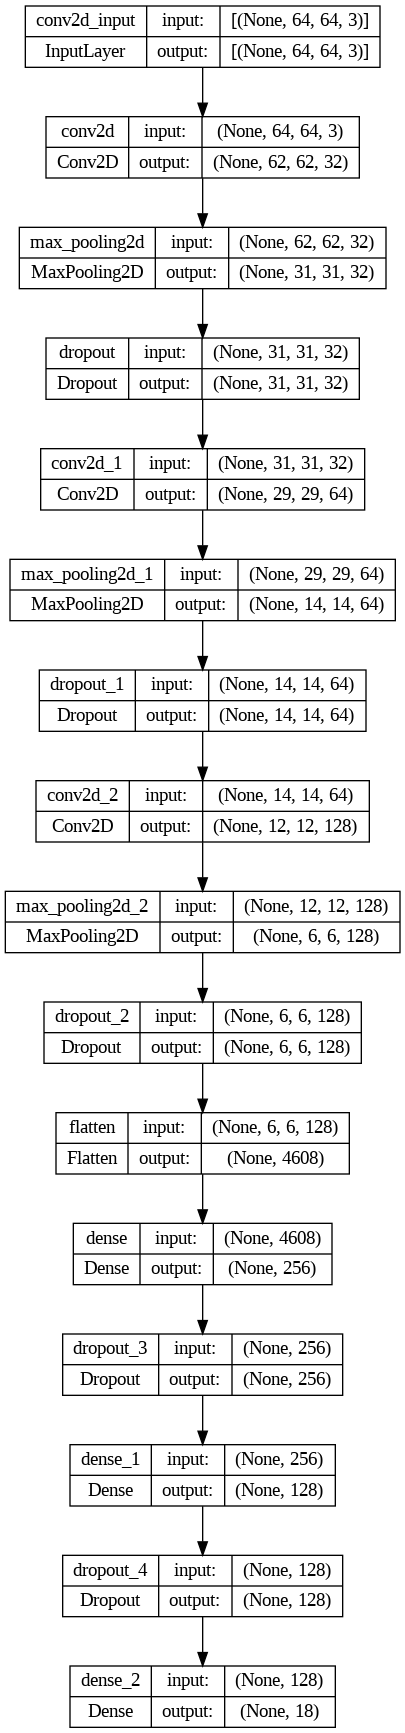

In [ ]:
plot_model(model,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

In [ ]:
%cd /content/
model.class_names = class_names
model.save("model.h5")

/content


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
